<a href="https://colab.research.google.com/github/10hour/foundations-for-analytics-with-python/blob/master/ResNet_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from skimage import io, transform
import numpy as np
import torchvision
from torchvision import transforms
import cv2
import pandas as pd

In [3]:
import os
names = []
labels = []
coco = []
broken_images = []
path = "/content/drive/MyDrive/my_data/"
public_id_list = list(set(sorted([x.split(".")[0] for x in os.listdir(path)])))

print(len(public_id_list))

1458


In [4]:
  for filename in public_id_list:
    file_path = path + filename
    img_path = file_path + ".jpg"
    txt_name = file_path + ".txt"


In [5]:
for filename in public_id_list:
    file_path = path + filename
    img_path = file_path + ".jpg"
    txt_name = file_path + ".txt"

    try:
        # 파일을 읽고 첫 번째 값을 정수로 파싱
        with open(txt_name, 'r') as infile:
            data = infile.readlines()
            first_line = data[0].strip()
            first_value = first_line.split()[0]
            label = int(first_value)
            print(f"Label for {filename}: {label}")
    except (ValueError, IndexError) as e:
        # 오류가 발생하면 오류 메시지와 파일 이름 출력
        print(f"Error processing file {txt_name}: {e}")

Label for image (1159): 1
Label for image (436): 5
Label for image (247): 6
Label for image (1237): 1
Label for image (591): 4
Label for image (711): 4
Label for image (380): 6
Label for image (1283): 1
Label for image (1127): 2
Label for image (1425): 1
Label for image (454): 5
Label for image (19): 4
Label for image (1403): 1
Label for image (147): 6
Label for image (513): 5
Label for image (1224): 1
Label for image (1311): 1
Label for image (1301): 1
Label for image (633): 4
Label for image (90): 6
Label for image (1154): 1
Label for image (1014): 2
Label for image (188): 6
Label for image (593): 4
Label for image (713): 4
Label for image (381): 6
Label for image (1027): 2
Label for image (758): 3
Label for image (979): 2
Label for image (1124): 2
Label for image (1080): 2
Label for image (434): 5
Label for image (559): 4
Label for image (898): 2
Label for image (1318): 1
Label for image (1175): 1
Label for image (844): 2
Label for image (348): 6
Label for image (1041): 2
Label for 

In [6]:
for filename in public_id_list:
    file_path = path + filename
    img_path = file_path + ".jpg"
    txt_name = file_path + ".txt"

    try:
        with open(txt_name, 'r') as infile:
            data = infile.readlines()
            # 첫 번째 라벨을 정수로 변환하려고 할 때 발생하는 오류를 처리
            first_line = data[0].strip()
            first_value = first_line.split()[0]
            label = int(first_value)

            # 나머지 줄을 '/'로 구분하여 문자열로 만듦
            a = ""
            for line in data[1:]:
                line = line.strip("\n")
                if not line == data[-1].strip("\n"):
                    a = a + line + "/"
                else:
                    a = a + line

        print(f"Contents for {filename}: {a}")

    except ValueError as e:
        print(f"Error processing file {txt_name}: {e}")

Contents for image (1159): 2 0.050521 0.458796 0.098958 0.243519
Contents for image (436): 8 0.519010 0.646759 0.023438 0.080556/8 0.675260 0.592130 0.010937 0.045370/0 0.748177 0.550000 0.043229 0.085185/0 0.817969 0.523148 0.058854 0.142593
Contents for image (247): 3 0.472135 0.408333 0.198437 0.212963/3 0.229687 0.421759 0.184375 0.184259/3 0.143490 0.445370 0.092188 0.092593/3 0.342708 0.387037 0.063542 0.066667/3 0.542188 0.286111 0.147917 0.205556/3 0.621615 0.353704 0.071354 0.087037/3 0.684115 0.325000 0.041146 0.070370/3 0.751563 0.306481 0.038542 0.053704/3 0.711719 0.306019 0.029687 0.049074
Contents for image (1237): 4 0.088802 0.570370 0.110937 0.170370/5 0.206250 0.681944 0.142708 0.636111
Contents for image (591): 7 0.482292 0.626389 0.040625 0.025000
Contents for image (711): 7 0.948698 0.551389 0.047396 0.052778
Contents for image (380): 3 0.748437 0.337500 0.059375 0.086111/3 0.647396 0.350000 0.062500 0.088889/3 0.573958 0.380556 0.116667 0.151852/3 0.476823 0.38842

In [7]:
names = []
labels = []
coco = []

for filename in public_id_list:
    a = ""
    file_path = path + filename
    img_path = file_path + ".jpg"
    txt_name = file_path + ".txt"

    try:
        # 파일을 읽고 데이터 파싱
        with open(txt_name, 'r') as infile:
            data = infile.readlines()

            # 첫 번째 줄에서 첫 번째 값만 정수로 변환
            first_line = data[0].strip()
            first_value = first_line.split()[0]
            label = int(first_value)

            # 나머지 줄을 '/'로 구분하여 문자열로 만듦
            for line in data[1:]:
                line = line.strip("\n")
                a += line + "/"
            a = a.rstrip("/")  # 마지막 슬래시 제거

        # 리스트에 결과 추가
        names.append(img_path)
        labels.append(label)
        coco.append(a)

    except (ValueError, IndexError) as e:
        print(f"Error processing file {txt_name}: {e}")

In [8]:
df = pd.DataFrame({
    "names": names,
    "labels": labels,
    "coco": coco})
df.head()

,names,labels,coco
0,/content/drive/MyDrive/my_data/image (1159).jpg,1,2 0.050521 0.458796 0.098958 0.243519
1,/content/drive/MyDrive/my_data/image (436).jpg,5,8 0.519010 0.646759 0.023438 0.080556/8 0.6752...
2,/content/drive/MyDrive/my_data/image (247).jpg,6,3 0.472135 0.408333 0.198437 0.212963/3 0.2296...
3,/content/drive/MyDrive/my_data/image (1237).jpg,1,4 0.088802 0.570370 0.110937 0.170370/5 0.2062...
4,/content/drive/MyDrive/my_data/image (591).jpg,4,7 0.482292 0.626389 0.040625 0.025000


In [9]:
class coco(Dataset):
    def __init__(self, df, transforms=None):

        self.df = df
        self.transforms = transforms

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):

        img_name = self.df.names[idx]

        image = io.imread(img_name)
        image = torch.as_tensor(image, dtype=torch.float32)
        image = cv2.imread(img_name)
        image = cv2.resize(image,dsize=(800,800),interpolation=cv2.INTER_CUBIC)
        label = self.df.labels[idx]-1

        a = self.df.coco[idx].split("/")

        image_idx = []

        num_objs = len(a)
        boxes = np.zeros((num_objs, 4), dtype=np.float32)
        gt_classes = np.zeros((num_objs), dtype=np.int32)
        objs = []

        for i in a:
          Class, cx,cy,yw,yh = i.split(" ")
          Class = int(Class)
          cx,cy,yw,yh = float(cx), float(cy),float(yw),float(yh)
          halfw, halfh = yw/2, yh/2
          x,y,x2,y2 = round((cx - halfw) * 800,2), round((cy-halfh) * 800,2),round((cx + halfw) * 800,2), round((cy+halfh) * 800,2)

          image_idx.append(Class)
          obj = [x, y, x2, y2]
          objs.append(obj)




        for ix, obj in enumerate(objs):
            boxes[ix, :] = obj
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        idx = torch.tensor(idx, dtype=torch.int32)
        image_idx = torch.as_tensor(image_idx, dtype=torch.int32)
        label = torch.tensor(label, dtype=torch.int32)



        target = {"boxes": boxes, "labels": image_idx, "image_id": idx, "Class": label}
        data = {'image':image, 'target' : label}

        if self.transforms:
          data = self.transforms(data)

        return data

    @staticmethod
    def collate_fn(batch):
        return tuple(zip(*batch))

    @property
    def class_to_coco_cat_id(self):
        return self._class_to_coco_cat_id

In [10]:
class ToTensor(object):

    def __call__(self, sample):
        image, label = sample['image'], sample['target']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image = image.transpose((2, 0, 1))
        return {'image': image,
                'target': label}

In [11]:
class ToTensor(object):

    def __call__(self, sample):
        image, label = sample['image'], sample['target']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image = image.transpose((2, 0, 1))
        return {'image': image,
                'target': label}

In [12]:
class Rescale(object):

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, target = sample['image'], sample['target']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        return {'image': image, 'target': target}

In [38]:
from sklearn.model_selection import train_test_split

# 계층적 분할을 위해 데이터프레임과 레이블 분리
X = df[['names', 'coco']]
y = df['labels']

# 계층적 샘플링을 통해 데이터프레임을 나눔
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, stratify=y)

# 데이터프레임 인덱스 초기화
train_df = pd.concat([train_X, train_y], axis=1).reset_index(drop=True)
val_df = pd.concat([val_X, val_y], axis=1).reset_index(drop=True)

# 데이터셋을 구성
trainset = coco(train_df, transforms=trans)
valset = coco(val_df, transforms=trans)


In [39]:
trans = transforms.Compose([Rescale((800,800)),
                            ToTensor()
                            ])
trainset = coco(train_df,transforms = trans)
valset = coco(val_df,transforms = trans)

0 (800, 800, 3) torch.Size([])
1 (800, 800, 3) torch.Size([])
2 (800, 800, 3) torch.Size([])
3 (800, 800, 3) torch.Size([])


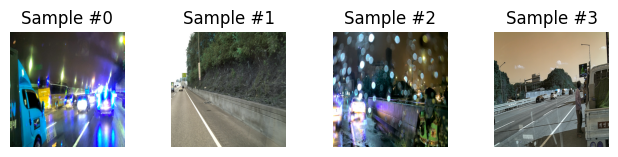

In [40]:
Traffic_dataset = coco(train_df)

fig = plt.figure()

for i in range(len(Traffic_dataset)):
  sample = Traffic_dataset[i]

  print(i, sample['image'].shape, sample['target'].shape)

  ax = plt.subplot(1,4, i+1)
  plt.tight_layout()
  ax.set_title('Sample #{}'.format(i))
  ax.imshow(sample['image'])
  ax.axis('off')
  ax.set_title('Sample #{}'.format(i))

  if i == 3:
    plt.show()
    break

In [41]:
dataloaders = {
    'train': DataLoader(trainset, batch_size=16, shuffle=True, num_workers=0),
    'val': DataLoader(valset, batch_size=16, shuffle=True, num_workers=0)
}

# 데이터셋 크기 업데이트
dataset_sizes =  {'train': len(dataloaders['train'].dataset), 'val' : len(dataloaders['val'].dataset)}

In [42]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [43]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image, ImageDraw

In [44]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

# 최신 방식에 따라 'weights'를 사용하여 ResNet34를 로드합니다.
from torchvision.models import ResNet34_Weights

# 'weights' 파라미터 사용
model_ft = models.resnet34(weights=ResNet34_Weights.IMAGENET1K_V1)

# 출력층을 새롭게 설정합니다.
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 6)

# 모델을 적절한 장치에 배치합니다.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft = model_ft.to(device)

# 손실 함수와 최적화 기법을 설정합니다.
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# 학습률 스케줄러를 정의합니다.
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)


In [47]:
def train_model(model, criterion, optimizer, scheduler, dataloaders, dataset_sizes, device, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_precision = 0.0
    best_recall = 0.0
    best_f1 = 0.0
    train_loss = []
    valid_loss = []
    train_acc = []
    valid_acc = []
    train_precision = []
    valid_precision = []
    train_recall = []
    valid_recall = []
    train_f1 = []
    valid_f1 = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0
            all_labels = []
            all_preds = []

            for sample in dataloaders[phase]:
                inputs, labels = sample['image'], sample['target']

                # 이미지와 레이블을 올바른 데이터 타입으로 변환
                inputs = inputs.to(device=device, dtype=torch.float32)
                labels = labels.to(device=device, dtype=torch.long)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)

                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(preds.cpu().numpy())

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            precision = precision_score(all_labels, all_preds, average='macro')
            recall = recall_score(all_labels, all_preds, average='macro')
            f1 = f1_score(all_labels, all_preds, average='macro')

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f} Precision: {precision:.4f} Recall: {recall:.4f} F1: {f1:.4f}')

            if phase == 'train':
                train_loss.append(epoch_loss)
                train_acc.append(epoch_acc.cpu().numpy())
                train_precision.append(precision)
                train_recall.append(recall)
                train_f1.append(f1)

            if phase == 'val':
                valid_loss.append(epoch_loss)
                valid_acc.append(epoch_acc.cpu().numpy())
                valid_precision.append(precision)
                valid_recall.append(recall)
                valid_f1.append(f1)

                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                if precision > best_precision:
                    best_precision = precision
                if recall > best_recall:
                    best_recall = recall
                if f1 > best_f1:
                    best_f1 = f1

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')
    print(f'Best Precision: {best_precision:.4f}')
    print(f'Best Recall: {best_recall:.4f}')
    print(f'Best F1: {best_f1:.4f}')

    # 그래프 그리기
    plt.figure()
    plt.plot(train_loss, label="train loss")
    plt.plot(valid_loss, label="valid loss")
    plt.legend()
    plt.savefig('./loss_graph.png')
    plt.show()

    plt.figure()
    plt.plot(train_acc, label="train accuracy")
    plt.plot(valid_acc, label="valid accuracy")
    plt.legend()
    plt.savefig('./accuracy_graph.png')
    plt.show()

    plt.figure()
    plt.plot(train_precision, label="train precision")
    plt.plot(valid_precision, label="valid precision")
    plt.legend()
    plt.savefig('./precision_graph.png')
    plt.show()

    plt.figure()
    plt.plot(train_recall, label="train recall")
    plt.plot(valid_recall, label="valid recall")
    plt.legend()
    plt.savefig('./recall_graph.png')
    plt.show()

    plt.figure()
    plt.plot(train_f1, label="train F1")
    plt.plot(valid_f1, label="valid F1")
    plt.legend()
    plt.savefig('./f1_graph.png')
    plt.show()

    model.load_state_dict(best_model_wts)
    return model


In [ ]:
import time
import torch.backends.cudnn as cudnn
import copy

cudnn.benchmark = True
#os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"
#torch.backends.cudnn.enabled = False
dataset_sizes = {'train': len(dataloaders['train'].dataset), 'val': len(dataloaders['val'].dataset)}
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, dataloaders, dataset_sizes, device, num_epochs=15)
torch.save(model_ft, f'./model5.pt')

Epoch 0/14
----------
train Loss: 0.0998 Acc: 0.9828 Precision: 0.9780 Recall: 0.9223 F1: 0.9414
val Loss: 0.4781 Acc: 0.8562 Precision: 0.8819 Recall: 0.7607 F1: 0.7791

Epoch 1/14
----------
train Loss: 0.1024 Acc: 0.9828 Precision: 0.9734 Recall: 0.9501 F1: 0.9601
val Loss: 0.4702 Acc: 0.8562 Precision: 0.8778 Recall: 0.7645 F1: 0.7795

Epoch 2/14
----------
train Loss: 0.1023 Acc: 0.9854 Precision: 0.9863 Recall: 0.9472 F1: 0.9630
val Loss: 0.4776 Acc: 0.8630 Precision: 0.8851 Recall: 0.7695 F1: 0.7851

Epoch 3/14
----------
train Loss: 0.1024 Acc: 0.9837 Precision: 0.9833 Recall: 0.9349 F1: 0.9524
val Loss: 0.4737 Acc: 0.8596 Precision: 0.8848 Recall: 0.7671 F1: 0.7839

Epoch 4/14
----------
train Loss: 0.1085 Acc: 0.9837 Precision: 0.9799 Recall: 0.9379 F1: 0.9545
val Loss: 0.4741 Acc: 0.8596 Precision: 0.8820 Recall: 0.7671 F1: 0.7824

Epoch 5/14
----------
train Loss: 0.1021 Acc: 0.9871 Precision: 0.9884 Recall: 0.9535 F1: 0.9680
val Loss: 0.4774 Acc: 0.8630 Precision: 0.8871 R